In [1]:
import importlib

#Py-ART, simply the best sowftware around.. Give those guys a grant
import cartopy
import pyart
#timezone info
import pytz
import os

#plotting
from matplotlib import pyplot as plt
import matplotlib
#plotting on a maop

import operator

import xarray as xr
import netCDF4

import scipy.ndimage as ndimage

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np
from cmac import cmac, quicklooks, get_sounding_times, get_sounding_file_name, config, cmac_processing
import copy
import matplotlib.colors as mc
import matplotlib.ticker as mt
import matplotlib.font_manager as fm

from scipy import ndimage

%matplotlib inline


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [2]:
radar = pyart.io.read(os.path.expanduser('~/data/pavlos/corcsapr2cfrhsrhiM1.a1.20181127.015215.nc'))

In [3]:

meta_config = config.get_metadata('cacti_csapr2_ppi')
cmac_config = config.get_cmac_values('cacti_csapr2_ppi')
field_config = config.get_field_names('cacti_csapr2_ppi')
emp_field = field_config['temperature']
alt_field = field_config['altitude']
vel_field = field_config['velocity']

#field_config['reflectivity'] = 'uncorrected_reflectivity_h'
#field_config['phidp'] = 'uncorrected_differential_phase'

ref_offset = cmac_config['ref_offset']
self_const = cmac_config['self_const']


In [4]:
#radar.fields['differential_phase']['data'] = radar.fields['differential_phase']['data']*-1.0 + 360.

In [5]:
texture = cmac_processing.get_texture(radar, 'uncorrected_mean_doppler_velocity_h')

In [6]:
radar.add_field('velocity_texture', texture, replace_existing=True)

In [7]:
left = -30
right = 0

In [8]:
print(radar.fields.keys())

dict_keys(['attenuation_corrected_differential_reflectivity', 'attenuation_corrected_differential_reflectivity_lag_1', 'attenuation_corrected_reflectivity_h', 'censor_mask', 'classification_mask', 'copol_correlation_coeff', 'differential_phase', 'differential_reflectivity', 'differential_reflectivity_lag_1', 'mean_doppler_velocity', 'mean_doppler_velocity_v', 'normalized_coherent_power', 'normalized_coherent_power_v', 'reflectivity', 'reflectivity_v', 'signal_to_noise_ratio_copolar_h', 'signal_to_noise_ratio_copolar_v', 'specific_differential_phase', 'spectral_width', 'spectral_width_v', 'uncorrected_copol_correlation_coeff', 'uncorrected_differential_phase', 'uncorrected_differential_reflectivity', 'uncorrected_differential_reflectivity_lag_1', 'uncorrected_mean_doppler_velocity_h', 'uncorrected_mean_doppler_velocity_v', 'uncorrected_reflectivity_h', 'uncorrected_reflectivity_v', 'uncorrected_spectral_width_h', 'uncorrected_spectral_width_v', 'unthresholded_power_copolar_h', 'unthresh

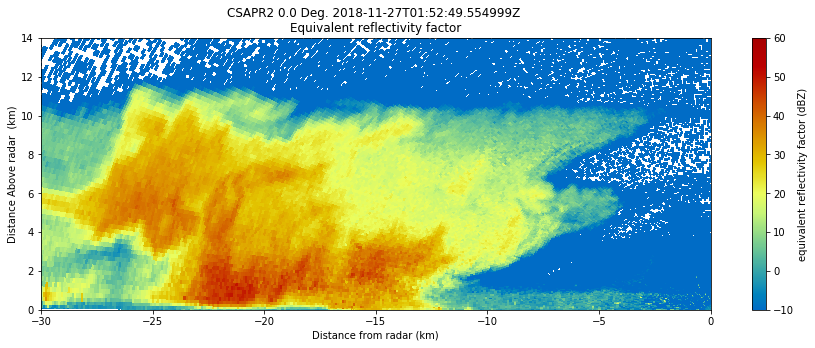

In [9]:
my_fig = plt.figure(figsize=[15,5])
my_display = pyart.graph.RadarDisplay(radar)
my_display.plot_rhi('reflectivity', 1, vmin=-10, vmax=60)
plt.ylim([0,14])
plt.xlim([left,right])
plt.savefig('/Users/scollis/Desktop/fullz.png')



(-30, 0)

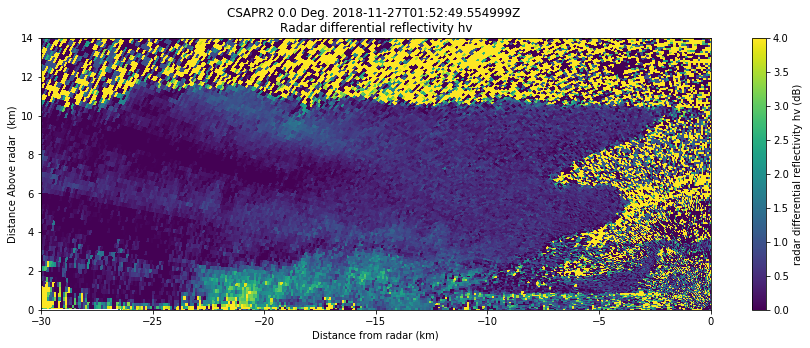

In [10]:
my_fig = plt.figure(figsize=[15,5])
my_display = pyart.graph.RadarDisplay(radar)
my_display.plot_rhi('attenuation_corrected_differential_reflectivity', 1, vmin=0, vmax=4)
plt.ylim([0,14])
plt.xlim([left,right])


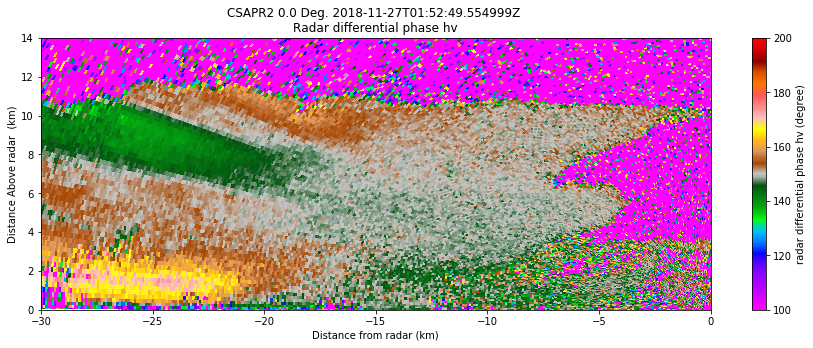

In [11]:
my_fig = plt.figure(figsize=[15,5])
my_display = pyart.graph.RadarDisplay(radar)
my_display.plot_rhi('differential_phase', 1, vmin=100, vmax=200)
plt.ylim([0,14])
plt.xlim([left,right])
plt.savefig('/Users/scollis/Desktop/cphidp.png')

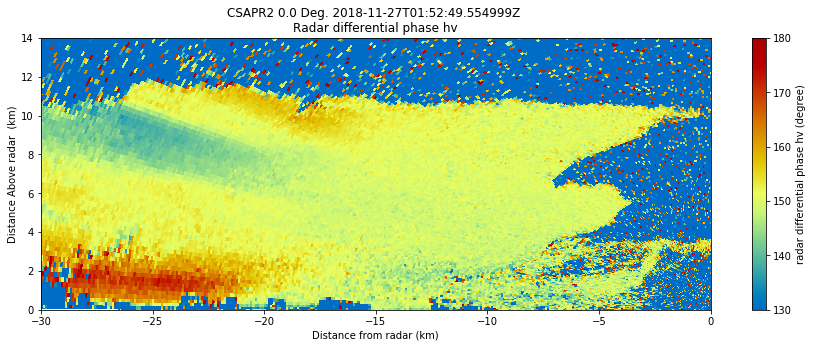

In [12]:
my_fig = plt.figure(figsize=[15,5])
my_display = pyart.graph.RadarDisplay(radar)
my_display.plot_rhi('uncorrected_differential_phase', 1, vmin=130, vmax=180, 
                    cmap=pyart.graph.cm_colorblind.HomeyerRainbow)
plt.ylim([0,14])
plt.xlim([left,right])
plt.savefig('/Users/scollis/Desktop/phidp.png')



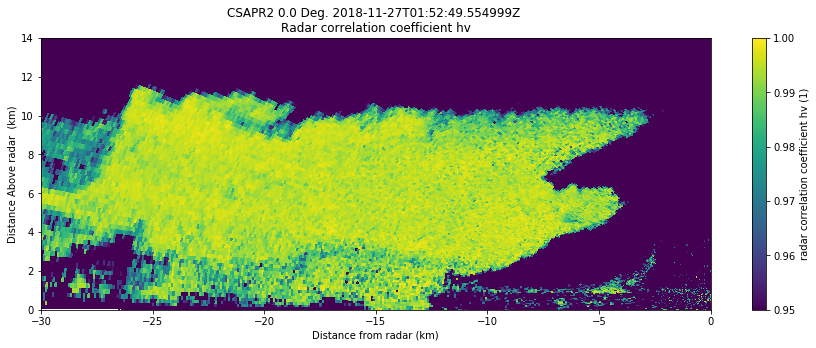

In [13]:
my_fig = plt.figure(figsize=[15,5])
my_display = pyart.graph.RadarDisplay(radar)
my_display.plot_rhi('copol_correlation_coeff', 1, vmin=.95, vmax=1)
plt.ylim([0,14])
plt.xlim([left,right])
plt.savefig('/Users/scollis/Desktop/copolrhv.png')



(-30, 0)

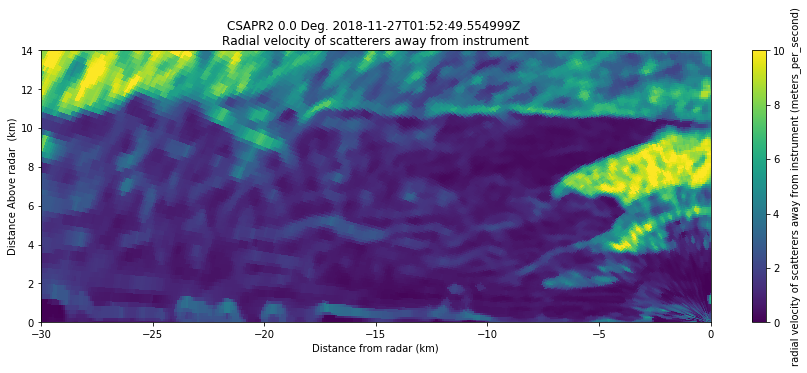

In [14]:
my_fig = plt.figure(figsize=[15,5])
my_display = pyart.graph.RadarDisplay(radar)
my_display.plot_rhi('velocity_texture', 1, vmin=0, vmax=10)
plt.ylim([0,14])
plt.xlim([left,right])


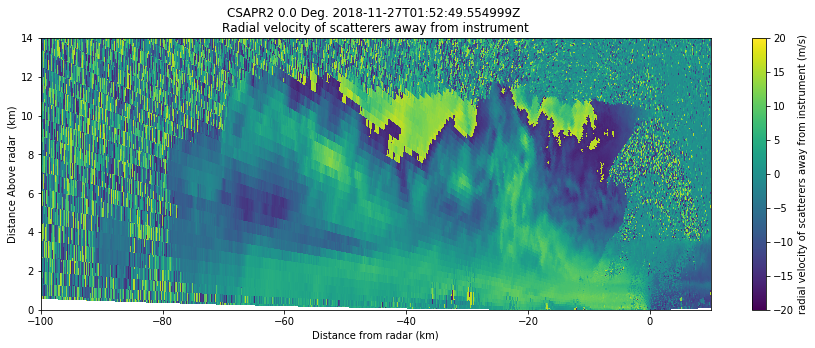

In [15]:
my_fig = plt.figure(figsize=[15,5])
my_display = pyart.graph.RadarDisplay(radar)
my_display.plot_rhi('mean_doppler_velocity', 1, vmin=-20, vmax=20)
plt.ylim([0,14])
plt.xlim([-100,10])
plt.savefig('/Users/scollis/Desktop/vel.png')


In [16]:
my_gf = pyart.filters.GateFilter(radar)
my_gf.include_all()
my_gf.exclude_above('velocity_texture', 10)
my_gf.exclude_below('copol_correlation_coeff', 0.95)
gatefilter_specks = pyart.correct.despeckle.despeckle_field(radar, 
                                                            'reflectivity', 
                                                            gatefilter=my_gf,
                                                            size=20)

gatefilter_specks_phidp = pyart.correct.despeckle.despeckle_field(radar, 
                                                            'uncorrected_differential_phase', 
                                                            gatefilter=gatefilter_specks,
                                                            size=3)



/Users/scollis/anaconda3/envs/cmac2/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


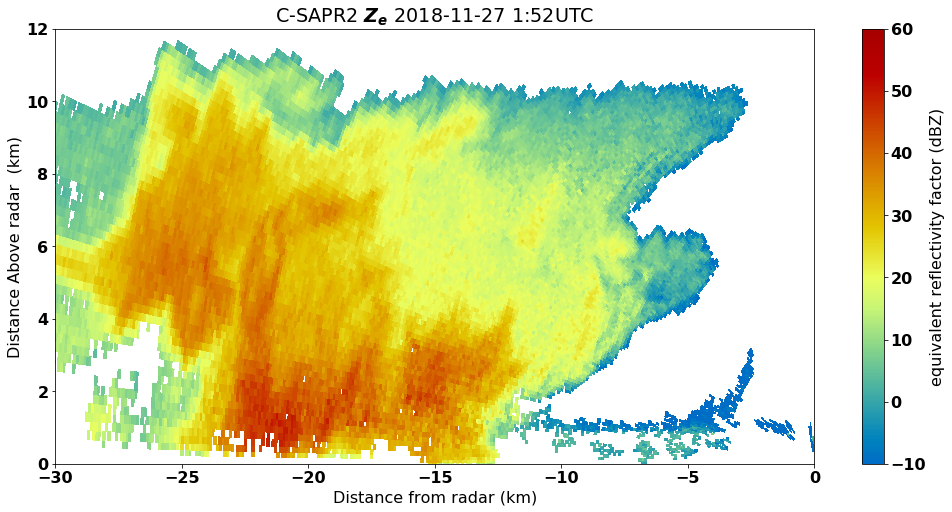

In [17]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 16}

matplotlib.rc('font', **font)

my_fig = plt.figure(figsize=[17,8])
my_display = pyart.graph.RadarDisplay(radar)
my_display.plot_rhi('reflectivity', 1, vmin=-10, vmax=60,
                   gatefilter=gatefilter_specks, title=r'C-SAPR2 $Z_e$ 2018-11-27 1:52UTC')
plt.ylim([0,12])
plt.xlim([left,right])



plt.savefig('/Users/scollis/Desktop/fullz.png')



In [18]:
phidp, kdp = pyart.correct.phase_proc_lp_gf(
    radar, gatefilter=gatefilter_specks_phidp, offset=0., debug=True,
    nowrap=50, fzl=2500., self_const=self_const, phidp_field='uncorrected_differential_phase')
phidp_filt, kdp_filt = cmac_processing.fix_phase_fields(
    copy.deepcopy(kdp), copy.deepcopy(phidp), radar.range['data'],
    gatefilter_specks_phidp)

Unfolding
Exec time:  1.4636969566345215
Doing  0
Doing  1
Doing  2
Doing  3
Doing  4
Doing  5
(2207, 1099)
(2207, 1100)


In [19]:
radar.add_field('corrected_differential_phase', phidp,
                replace_existing=True)
radar.add_field('filtered_corrected_differential_phase', phidp_filt,
                replace_existing=True)
radar.add_field('corrected_specific_diff_phase', kdp,
                replace_existing=True)
radar.add_field('filtered_corrected_specific_diff_phase', kdp_filt,
                replace_existing=True)

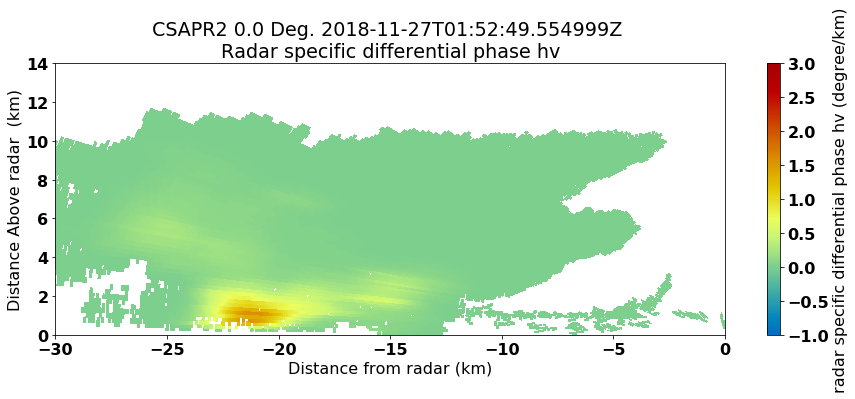

In [20]:
my_fig = plt.figure(figsize=[15,5])
my_display = pyart.graph.RadarDisplay(radar)
my_display.plot_rhi('corrected_specific_diff_phase', 1, vmin=-1, vmax=3, 
                    cmap=pyart.graph.cm_colorblind.HomeyerRainbow,
                   gatefilter=gatefilter_specks_phidp)
plt.ylim([0,14])
plt.xlim([left,right])
plt.savefig('/Users/scollis/Desktop/kdp.png')


In [21]:
vpkdp, vpphidp = pyart.retrieve.kdp_proc.kdp_vulpiani(radar, 
                                                              gatefilter=gatefilter_specks_phidp, 
                                                              fill_value=None, 
                                                              psidp_field=None, 
                                                              kdp_field=None, 
                                                              phidp_field='unfolded_differential_phase', 
                                                              band='C', 
                                                              windsize=10, 
                                                              n_iter=10, 
                                                              interp=False, 
                                                              prefilter_psidp=False, 
                                                              filter_opt=None, parallel=False)

radar.add_field('vulp_differential_phase', vpphidp,
            replace_existing=True)
radar.add_field('vulp_specific_diff_phase', vpkdp,
                replace_existing=True)

/Users/scollis/anaconda3/envs/cmac2/lib/python3.6/site-packages/pyart/retrieve/kdp_proc.py:975: RuntimeWarning: invalid value encountered in less_equal
  kdp_calc[kdp_calc <= th1] = 0.
/Users/scollis/anaconda3/envs/cmac2/lib/python3.6/site-packages/pyart/retrieve/kdp_proc.py:976: RuntimeWarning: invalid value encountered in greater_equal
  kdp_calc[kdp_calc >= th2] = 0.


In [22]:
mkdp, mkphf, mkphr = pyart.retrieve.kdp_proc.kdp_maesaka(radar, 
                                                                 gatefilter=gatefilter_specks_phidp, 
                                                                 method='cg', 
                                                                 backscatter=None,
                                                                 Clpf=1.0, 
                                                                 length_scale=None, 
                                                                 first_guess=0.01,
                                                                 finite_order='low',
                                                                 fill_value=None, 
                                                                 proc=1, 
                                                                 psidp_field=None, 
                                                                 kdp_field=None, 
                                                                 phidp_field='unfolded_differential_phase',
                                                                 debug=False, 
                                                                 verbose=False)


radar.add_field('mes_differential_phase_forward', mkphf,
                replace_existing=True)
radar.add_field('mes_differential_phase_reverse', mkphr,
                replace_existing=True)

radar.add_field('mes_specific_diff_phase', mkdp,
                replace_existing=True)

/Users/scollis/anaconda3/envs/cmac2/lib/python3.6/site-packages/numpy/core/fromnumeric.py:734: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


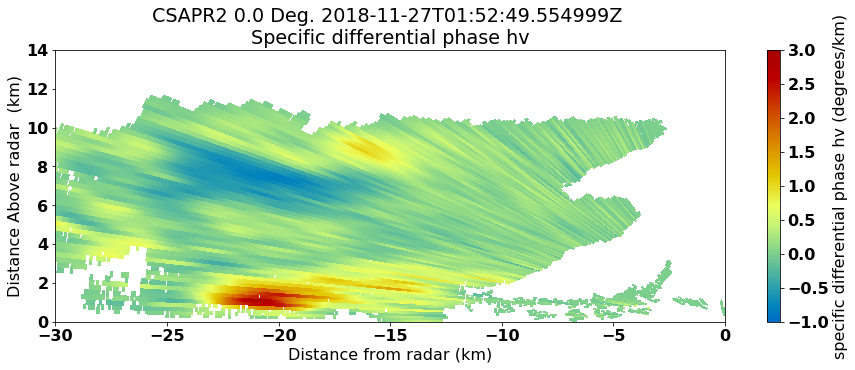

In [23]:
my_fig = plt.figure(figsize=[15,5])
my_display = pyart.graph.RadarDisplay(radar)
my_display.plot_rhi('vulp_specific_diff_phase', 1, vmin=-1, vmax=3, 
                    cmap=pyart.graph.cm_colorblind.HomeyerRainbow,
                   gatefilter=gatefilter_specks_phidp)
plt.ylim([0,14])
plt.xlim([left,right])
plt.savefig('/Users/scollis/Desktop/kdp.png')


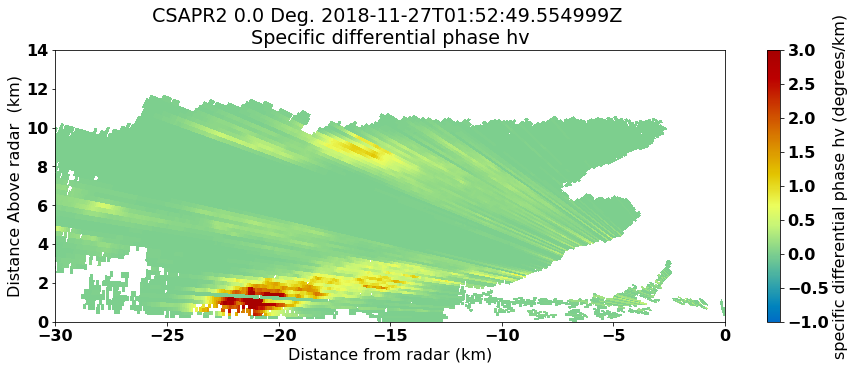

In [24]:
my_fig = plt.figure(figsize=[15,5])
my_display = pyart.graph.RadarDisplay(radar)
my_display.plot_rhi('mes_specific_diff_phase', 1, vmin=-1, vmax=3, 
                    cmap=pyart.graph.cm_colorblind.HomeyerRainbow,
                   gatefilter=gatefilter_specks_phidp)
plt.ylim([0,14])
plt.xlim([left,right])
plt.savefig('/Users/scollis/Desktop/kdp.png')


In [25]:
def ramp(ht, fzl=2500., th = 200):
    t0 = fzl - th
    t1 = fzl + th
    slope = 1 / (t1 - t0)
    y = np.minimum(slope * np.maximum(ht - t0, 0.0), 1)
    return y


In [26]:
z = np.linspace(0,5000,100)
wts = ramp(z, th=1000)


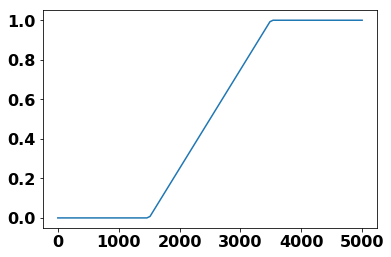

In [27]:
plt.plot(z,wts)

In [28]:
b_fzl = 3000.
th = 100.
wts_lp = -1.* ramp(radar.gate_altitude['data'], fzl=b_fzl, th = th)  +1.
wts_vu = ramp(radar.gate_altitude['data'], fzl=b_fzl, th = th)

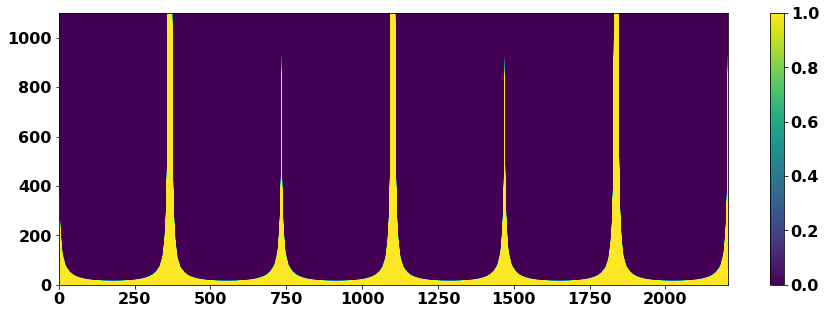

In [29]:
my_fig = plt.figure(figsize=[15,5])
plt.pcolormesh(wts_lp.transpose())
plt.colorbar()

(0.0, 1100.0)

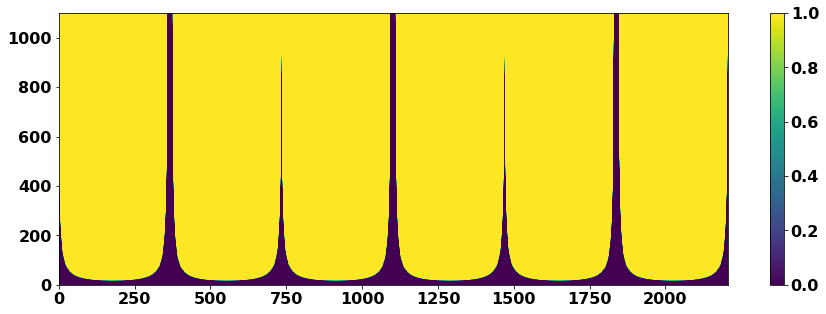

In [30]:
my_fig = plt.figure(figsize=[15,5])
plt.pcolormesh(wts_vu.transpose())
plt.colorbar()
plt.ylim()

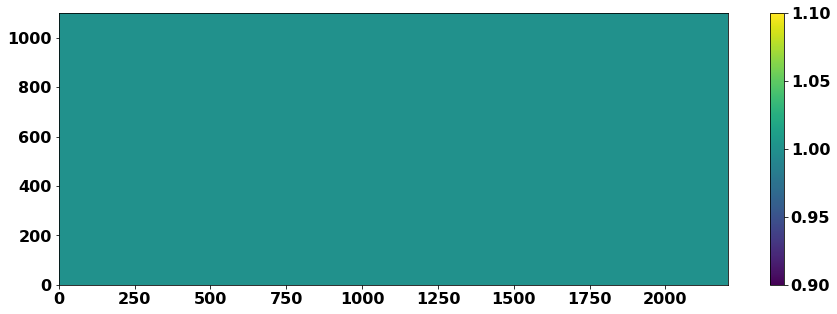

In [31]:
my_fig = plt.figure(figsize=[15,5])
plt.pcolormesh((wts_vu + wts_lp).transpose())
plt.colorbar()

In [33]:
guass_filtered_vulp = ndimage.gaussian_filter1d(radar.fields['vulp_specific_diff_phase']['data'], 1, 0)


mixed = wts_lp * radar.fields['corrected_specific_diff_phase']['data'] + wts_vu * guass_filtered_vulp

mixed[gatefilter_specks_phidp.gate_excluded] = np.ma.masked#pyart.config.get_fillvalue()

In [34]:
radar.add_field_like('corrected_specific_diff_phase', 'blended_phase', mixed, replace_existing=True)

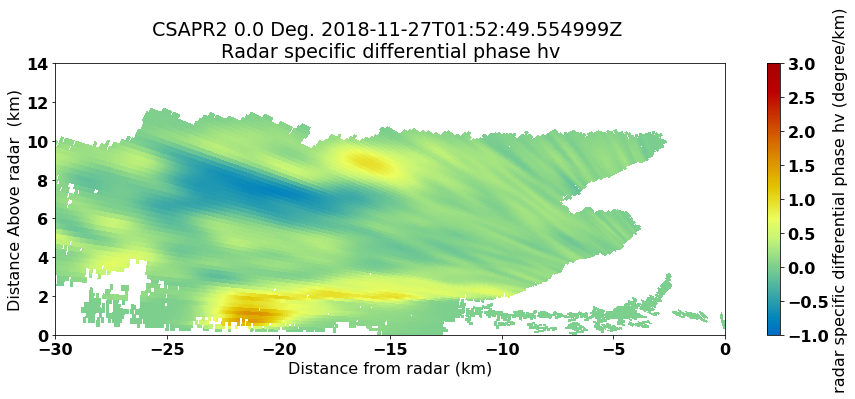

In [35]:
my_fig = plt.figure(figsize=[15,5])
my_display = pyart.graph.RadarDisplay(radar)
my_display.plot_rhi('blended_phase', 1, vmin=-1, vmax=3, 
                    cmap=pyart.graph.cm_colorblind.HomeyerRainbow,
                   gatefilter=gatefilter_specks_phidp)
plt.ylim([0,14])
plt.xlim([left,right])
plt.savefig('/Users/scollis/Desktop/kdp.png')


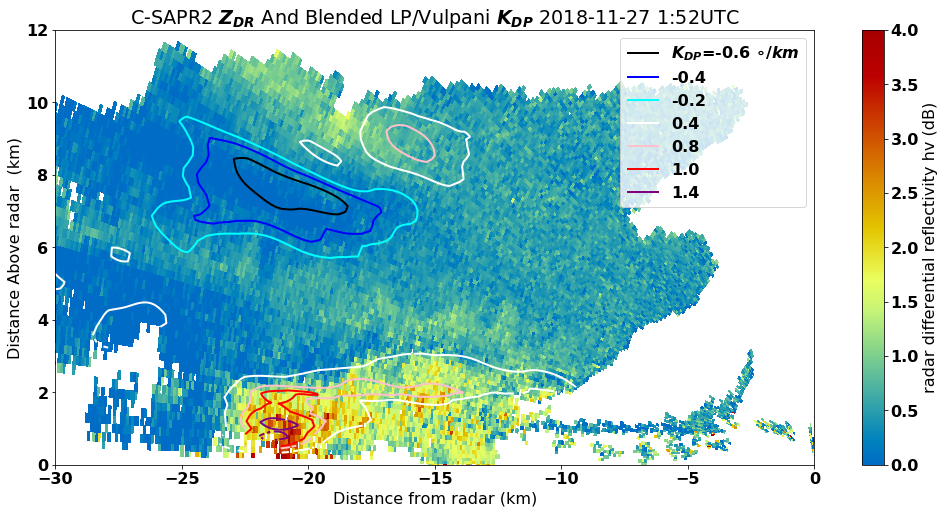

In [36]:
#kdp_to_be_plotted = radar.extract_sweeps([1]).fields['blended_phase']['data']
sweep = 1
data = radar.get_field(sweep, 'blended_phase')
x, y, z = radar.get_gate_x_y_z(sweep, edges=False)

x /= 1000.0
y /= 1000.0
z /= 1000.0

R = np.sqrt(x ** 2 + y ** 2) * np.sign(y)


my_fig = plt.figure(figsize=[17,8])
my_display = pyart.graph.RadarDisplay(radar)
my_display.plot_rhi('attenuation_corrected_differential_reflectivity', 1, vmin=0, vmax=4,
                   cmap=pyart.graph.cm_colorblind.HomeyerRainbow,
                   gatefilter=gatefilter_specks_phidp, 
                    title=r'C-SAPR2 $Z_{DR}$ And Blended LP/Vulpani $K_{DP}$ 2018-11-27 1:52UTC')

ax = plt.gca()
# add contours
# creates steps 35 to 100 by 5

negs = 'pink'
pos = 'black'
levels = [-.6, -.4, -.2, .4, .8, 1.0, 1.4]
colors = [ 'black', 'blue', 'cyan','white', 'pink', 'red', 'purple']
labl = {-.6: r'$K_{DP}$=-0.6 $\circ{}/ km$',
        -.4: '-0.4',
        -.2: '-0.2',
        .4: '0.4',
        .6: '0.8',
        .8: '1.0',
        1.: '1.4'}

# adds contours to plot
contours = ax.contour(R, z, data, levels, linewidths=2, colors=colors,
                      antialiased=True)
#CS = ax.contour(correct_lons, correct_lats, refl_smooth ,
#                levels = [15., 30., 45.],
#                transform = cartopy.crs.PlateCarree(), colors=['purple', 'pink', 'yellow'],
#linewidths=3)
#plt.clabel(contours, levels, fmt='%r', inline=True, fontsize=12)
ax.clabel(contours, inline=False, fontsize=15, fmt=labl)
h1,_ = contours.legend_elements()
ax.legend(h1, list(labl.values()))

plt.ylim([0,12])
plt.xlim([left,right])
plt.savefig('/Users/scollis/Desktop/combined.png')

